### Цели 
* Подготовить данные для исследования.
* Задать функции для более удобного расчета требуемых параметров.
* Исследовать пользователей и составить их профили. 
* Разбить профили пользователей на регионы, девайсы и источники привлечения.
* Посчитать общие траты на маркетинг.
* Разбить траты на маркетинг на каждый источник и посчитать их по месяцам.
* Оценить окупаемость рекламы в целом. 
* Проанализировать конверсию и удержание пользователей.
* Оценить окупаемость рекламы в зависимость от страны, девайса и источника привлечения.
* Дать рекомендации 


### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Загрузка и исследование visits

In [2]:
visits = pd.read_csv('/Volumes/Element_SE/visits_info_short.csv')
visits

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.duplicated().sum()

0

In [5]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Изучаем полученные данные. Нет пропусков или дубликатов, но зато неверно определены даты. Поменяем тип столбцов у дат

In [6]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'], format='%Y-%m-%d %H:%M:%S')
visits['Session End'] = pd.to_datetime(visits['Session End'], format='%Y-%m-%d %H:%M:%S')

In [7]:
def date_type (row):
    if row['Session Start'] < row['Session End']:
        return 'ок'
    else:
        return 'обратить внимание'
visits['date_verify'] = visits.apply(date_type, axis=1)

In [8]:
visits.groupby('date_verify')['User Id'].nunique()

date_verify
обратить внимание       163
ок                   149971
Name: User Id, dtype: int64

In [9]:
visits.query('date_verify == "обратить внимание"')

,User Id,Region,Device,Channel,Session Start,Session End,date_verify
100,172991619815,United States,Android,organic,2019-05-01 23:30:20,2019-05-01 23:30:20,обратить внимание
396,70966634103,United States,iPhone,FaceBoom,2019-05-01 10:09:06,2019-05-01 10:09:06,обратить внимание
6418,237822984474,United States,iPhone,FaceBoom,2019-05-08 11:44:29,2019-05-08 11:44:29,обратить внимание
7658,691394091917,United States,iPhone,organic,2019-05-09 19:23:10,2019-05-09 19:23:10,обратить внимание
8549,851693391616,United States,PC,TipTop,2019-05-10 03:28:02,2019-05-10 03:28:02,обратить внимание
...,...,...,...,...,...,...,...
298392,869320035302,France,Mac,AdNonSense,2019-10-11 17:58:06,2019-10-11 17:58:06,обратить внимание
300057,170196678386,France,PC,organic,2019-10-14 10:32:08,2019-10-14 10:32:08,обратить внимание
302612,14571051192,Germany,iPhone,LeapBob,2019-10-18 13:33:12,2019-10-18 13:33:12,обратить внимание
302852,716198028632,UK,Android,OppleCreativeMedia,2019-10-19 00:07:45,2019-10-19 00:07:45,обратить внимание


In [10]:
visits = visits.query('date_verify != "обратить внимание"')
visits

,User Id,Region,Device,Channel,Session Start,Session End,date_verify
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,ок
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,ок
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,ок
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,ок
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,ок
...,...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29,ок
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36,ок
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31,ок
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55,ок


In [11]:
visits.dtypes

User Id                   int64
Region                   object
Device                   object
Channel                  object
Session Start    datetime64[ns]
Session End      datetime64[ns]
date_verify              object
dtype: object

Замена произведена

#### Загрузка и исследование orders

In [12]:
orders = pd.read_csv('/Volumes/Element_SE/orders_info_short.csv')
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
orders.duplicated().sum()

0

In [15]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [16]:
orders['Revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

Изучаем полученные данные. Нет пропусков или дубликатов, но зато неверно определены даты. Поменяем тип столбцов у дат

In [17]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'], format='%Y-%m-%d %H:%M:%S')


Замена произведена

In [18]:
orders.dtypes

User Id              int64
Event Dt    datetime64[ns]
Revenue            float64
dtype: object

#### Загрузка и исследование costs

In [19]:
costs = pd.read_csv('/Volumes/Element_SE/costs_info_short.csv')
costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [21]:
costs.duplicated().sum()

0

In [22]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [23]:
costs['costs'].unique()

array([113.3  ,  78.1  ,  85.8  , 136.4  , 122.1  , 118.8  , 101.2  ,
       100.1  ,  93.5  , 104.5  , 132.   , 105.6  ,  92.4  , 110.   ,
       117.7  , 128.7  ,  99.   ,  88.   , 115.5  ,  97.9  ,  82.5  ,
       140.8  ,  91.3  , 107.8  , 169.4  , 178.2  , 213.4  , 214.5  ,
       234.3  , 159.5  , 147.4  , 138.6  , 143.   , 193.6  , 135.3  ,
       163.9  , 124.3  , 114.4  , 176.   , 210.1  , 158.4  , 144.1  ,
       171.6  , 174.9  , 258.5  , 232.1  , 237.6  , 217.8  , 227.7  ,
       235.4  , 255.2  , 264.   , 242.   , 233.2  , 204.6  , 240.9  ,
       194.7  , 179.3  , 168.3  , 156.2  , 134.2  , 182.6  , 160.6  ,
       123.2  ,  90.2  , 108.9  , 145.2  , 189.2  , 141.9  , 133.1  ,
       206.8  , 198.   , 167.2  , 161.7  , 218.9  , 261.8  , 216.7  ,
       229.9  , 155.1  , 188.1  , 205.7  , 192.5  , 152.9  , 228.8  ,
       225.5  , 203.5  , 191.4  , 211.2  , 207.9  , 221.1  , 183.7  ,
       148.5  , 170.5  , 195.8  , 173.8  , 248.6  , 299.2  , 236.5  ,
       243.1  , 294.

Изучаем полученные данные. Нет пропусков или дубликатов, но зато неверно определены даты. Поменяем тип столбцов у дат

In [24]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [25]:
costs.dtypes

dt         datetime64[ns]
Channel            object
costs             float64
dtype: object

Замена произведена

Данные представлены корректные. За исключением некоторого, незначительного числа старта сессий, которые почему-то оказались равны окончанию сессии. Вероятно, это произошло потому что сессия была слишком короткой или неверно считана.

### Задаем функции, необходимые для анализа



#### get_profiles()

In [26]:
def get_profiles(visits, orders, costs):

    profiles = (
        visits.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',

                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )

        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())

    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})

        .rename(columns={'User Id': 'unique_users'})
        .reset_index()  
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'], format='%Y-%m-%d')

    costs = costs.merge(new_users, on=['dt', 'Channel'], how='left')

    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    profiles['dt'] = pd.to_datetime(profiles['dt'], format='%Y-%m-%d')
    profiles = profiles.merge(
        costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### get_retention()

In [27]:
def get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - \
            timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        visits[['User Id', 'Session Start']], on='User Id', how='left')
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']).dt.days

    def group_by_dimensions(df, dims, horizon_days):

        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique')
        cohort_sizes = df.groupby(dims).agg({'User Id': 'nunique'}).rename(
            columns={'User Id': 'cohort_size'})

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)

        result = result[['cohort_size'] + list(range(horizon_days))]

        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time

#### get_conversion()

In [28]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        orders.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['User Id', 'Event Dt']], on='User Id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

#### get_ltv()

In [29]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        orders[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):

        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        )

        result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)

        result = result[['cohort_size'] + list(range(horizon_days))]

        result['cohort_size'] = cohort_sizes

        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,
        result_grouped,
        result_in_time,
        roi_grouped,
        roi_in_time,
    )

#### filter_data()

In [30]:
def filter_data(df, window):

    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### plot_retention()

In [31]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])

    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)

    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### plot_conversion()

In [32]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])

    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [

        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### plot_ltv_roi()

In [33]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])

    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])

    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)

    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)

    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных


#### Исследование пользователей

In [34]:
profiles = get_profiles(visits, orders, costs)
date = profiles[['User Id', 'first_ts']]
print('минимальная и максимальная дата привлечения пользователей',
      date.agg({'first_ts': ['min', 'max']}))

минимальная и максимальная дата привлечения пользователей                first_ts
min 2019-05-01 00:00:41
max 2019-10-30 08:00:10


Максимальная дата от 30 октября. Сейчас 1 ноября. Срок окупаемости 14 дней, поэтому часть пользователей не войдут в анализ отчета. 

In [35]:
visits.groupby('User Id').agg({'Session Start': ['min', 'max']})

Session Start                    
                             min                 max
User Id                                             
599326       2019-05-07 20:58:57 2019-05-09 07:33:16
4919697      2019-07-09 12:46:07 2019-07-10 22:27:24
6085896      2019-10-01 09:58:33 2019-10-03 10:08:12
22593348     2019-08-22 21:35:48 2019-08-22 21:35:48
31989216     2019-10-02 00:07:44 2019-10-02 00:07:44
...                          ...                 ...
999956196527 2019-09-28 08:33:02 2019-09-29 07:00:02
999975439887 2019-10-21 00:35:17 2019-10-27 03:10:38
999976332130 2019-07-23 02:57:06 2019-07-23 02:57:06
999979924135 2019-09-28 21:28:09 2019-10-04 07:37:05
999999563947 2019-10-18 19:57:25 2019-10-20 04:10:34

[149971 rows x 2 columns]

минимальная и максимальная дата для каждого из пользователей

#### Исследование профилей пользователей

In [36]:
profiles = get_profiles(visits, orders, costs)

profiles

,User Id,first_ts,Channel,Device,Region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.884211
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
149966,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
149967,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
149968,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
149969,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Для того чтобы исследовать пользователей, нам нужно извлечь их профили. Для этого обратимся к функции, которую задали выше.

#### Количество пользователей по странам

In [37]:
region_profiles = profiles.groupby('Region').agg(
    {'User Id': 'nunique', 'payer': 'mean', }).reset_index()
region_profiles['payer'] = region_profiles['payer']*100
region_profiles

,Region,User Id,payer
0,France,17444,3.800734
1,Germany,14978,4.112699
2,UK,17573,3.983384
3,United States,99976,6.903657


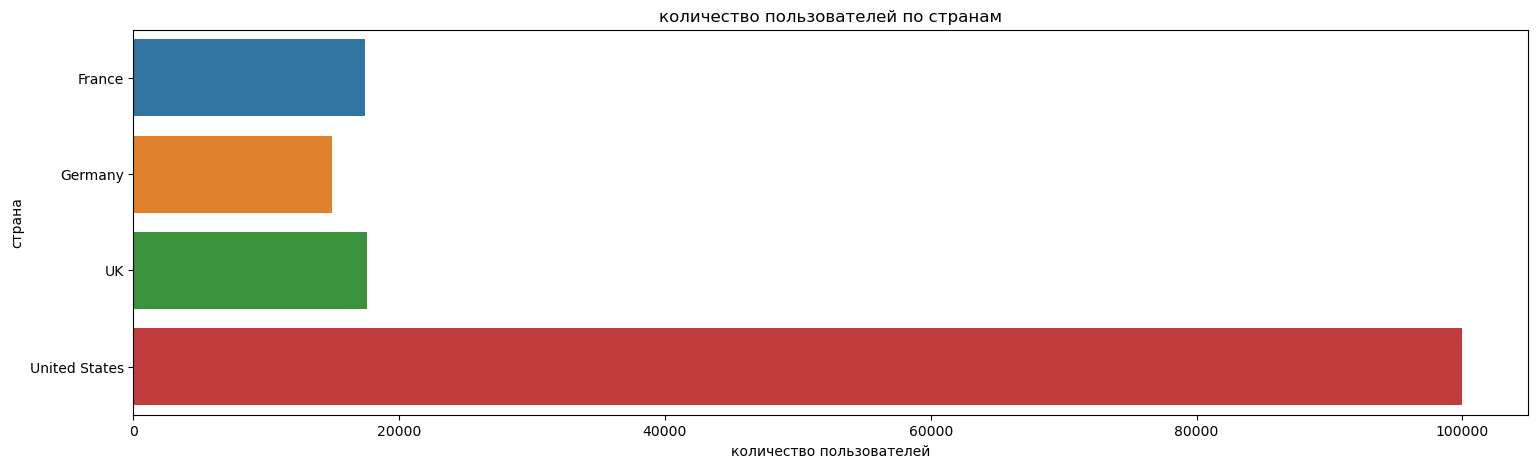

In [38]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='User Id', y='Region', data=region_profiles)
ax.set(title='количество пользователей по странам',
       xlabel='количество пользователей', ylabel='страна')
plt.xlim()
plt.show()

Как видно из таблицы и графика, количество пользователей в США больше чем в других странах. На втором месте Великобритания, но Франция имеет почти такое же количество пользователей.

#### Количество платящих пользоватлей по странам

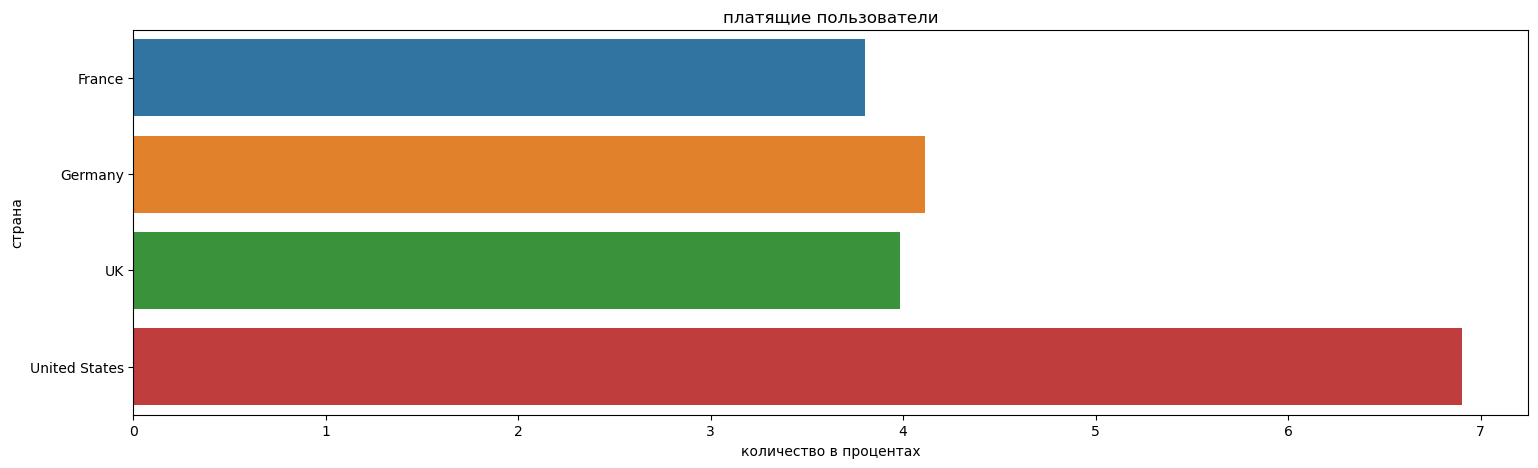

In [39]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='payer', y='Region', data=region_profiles)


ax.set(title='платящие пользователи',
       xlabel='количество в процентах', ylabel='страна')

plt.xlim()
plt.show()

Количество платящих пользователей тоже больше в США, но тут, как ни странно, на втором месте Германия, хотя она имеет меньшее количество пользователей.

#### Количество пользователей по девайсам

In [40]:
device_profiles = profiles.groupby('Device').agg(
    {'payer': 'mean', 'User Id': 'nunique'}).reset_index()
device_profiles['payer'] = device_profiles['payer']*100
device_profiles

,Device,payer,User Id
0,Android,5.852962,35025
1,Mac,6.365483,30037
2,PC,5.047785,30449
3,iPhone,6.210062,54460


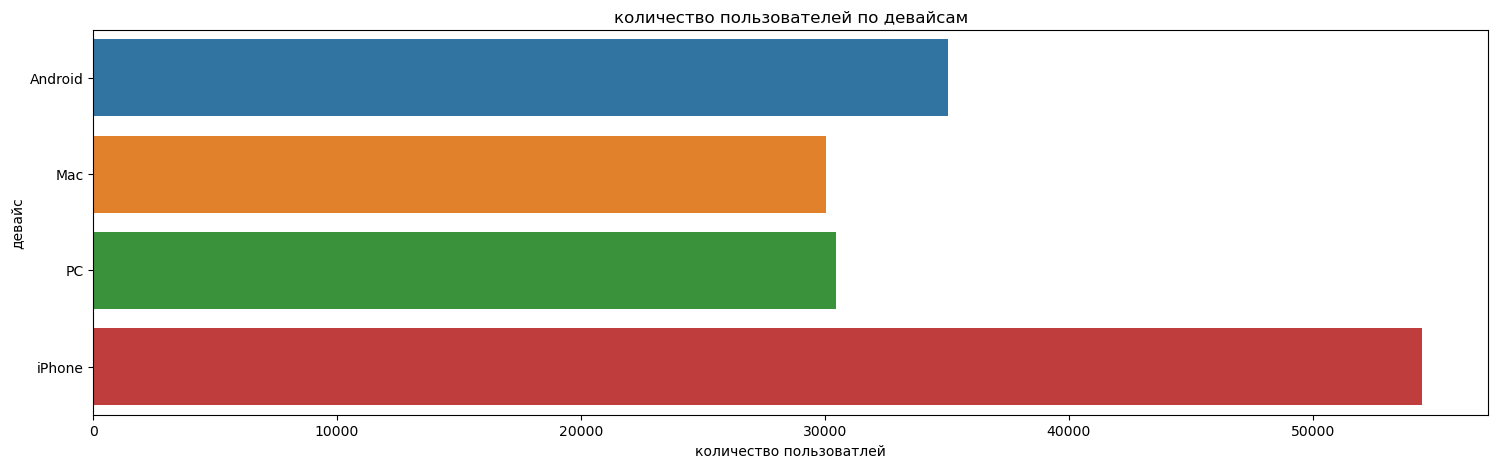

In [41]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='User Id', y='Device', data=device_profiles)
ax.set(title='количество пользователей по девайсам',
       xlabel='количество пользоватлей', ylabel='девайс')
plt.xlim()
plt.show()

Больше всего платящих пользоватлей на устройстве iphone. На втором месте android. Можно сделать вывод что большая часть пользователей используют приложение с мобильных устройств, но на стационарных тоже достаточное количество пользоватлей.

#### Количество платящих пользователей по девайсам

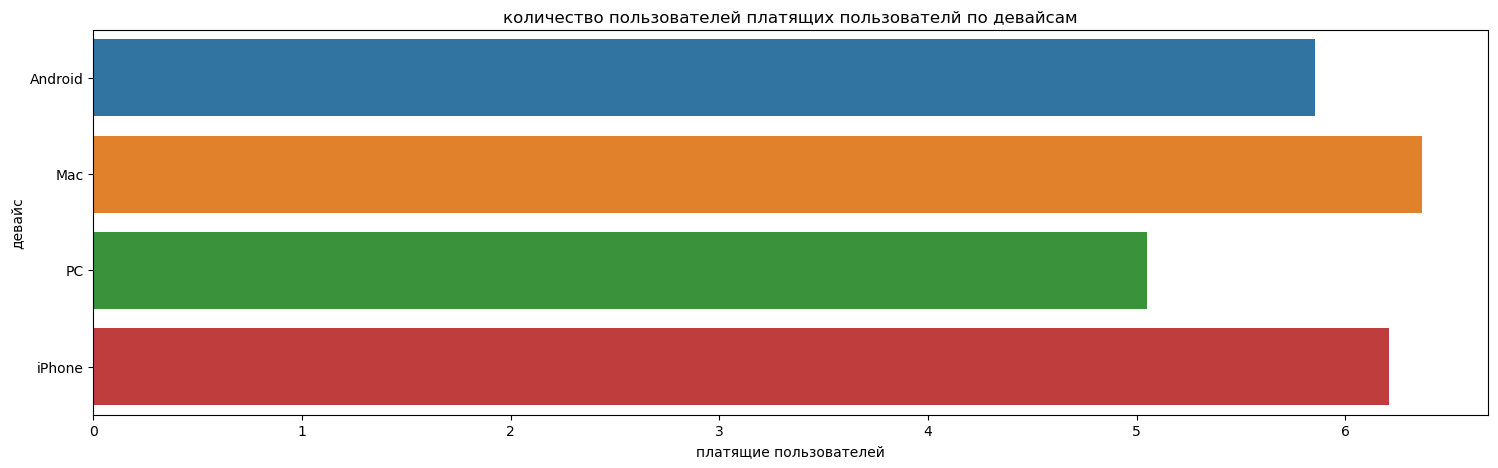

In [42]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='payer', y='Device', data=device_profiles)
ax.set(title='количество пользователей платящих пользователй по девайсам',
       xlabel='платящие пользователей', ylabel='девайс')
plt.xlim()
plt.show()

Вот платить больше всего предпочитают пользователи на mac и iphone. Как правило, это более дорогие девайсы, так что не удивительно что количество платящих пользоватлей бьольше именно там

#### Количество пользователей по источникам привлечения

In [43]:
chanel_profiles = profiles.groupby('Channel').agg(
    {'payer': 'mean', 'User Id': 'nunique'}).reset_index()
chanel_profiles['payer'] = chanel_profiles['payer']*100
chanel_profiles

,Channel,payer,User Id
0,AdNonSense,11.340206,3880
1,FaceBoom,12.208684,29135
2,LeapBob,3.063611,8552
3,MediaTornado,3.575521,4363
4,OppleCreativeMedia,2.708672,8602
5,RocketSuperAds,7.915449,4447
6,TipTop,9.603191,19556
7,WahooNetBanner,5.298865,8549
8,YRabbit,3.826531,4312
9,lambdaMediaAds,10.469986,2149


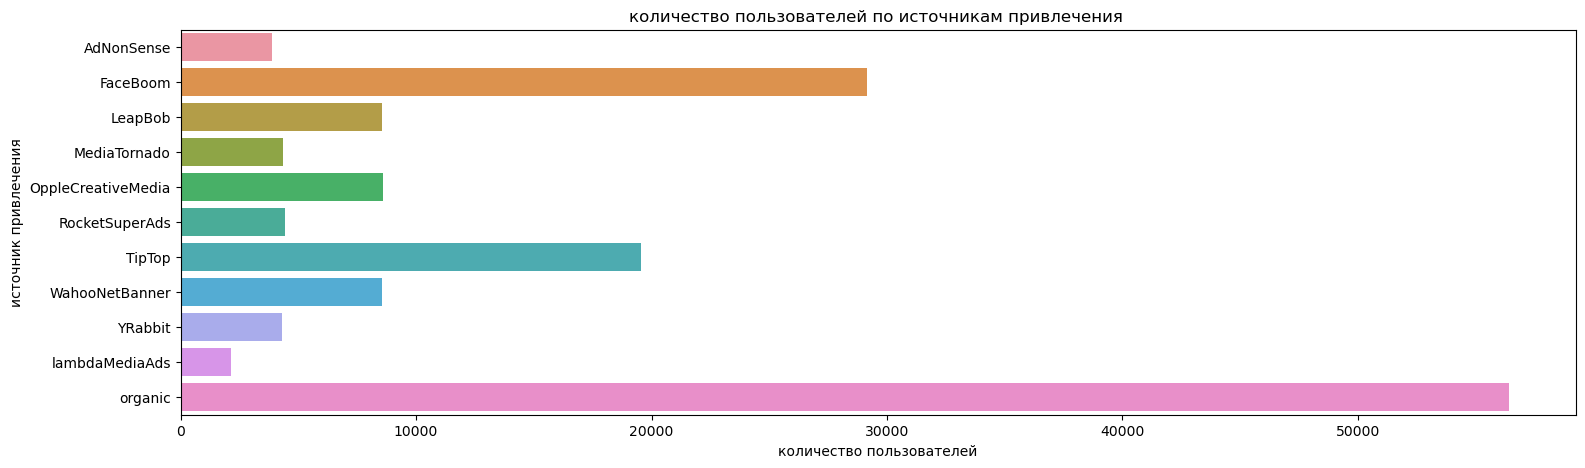

In [44]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='User Id', y='Channel', data=chanel_profiles)
ax.set(title='количество пользователей по источникам привлечения ',
       xlabel='количество пользователей', ylabel='источник привлечения')
plt.xlim()
plt.show()

Больше всего пользоватлей пришли органическим образом. Это говорит что приложение достаточно полезно пользователям и они делятся/находят его самостоятельно. Это хорошо, так как это "бесплатные" пользователи. На втором месте социальная сеть faceboom. Вероятно, там достаточно хорошо раскручена группа приложения. Немного остают по количеству пользователи TipTop. 

#### Количество платящих пользователей по источникам привлечения

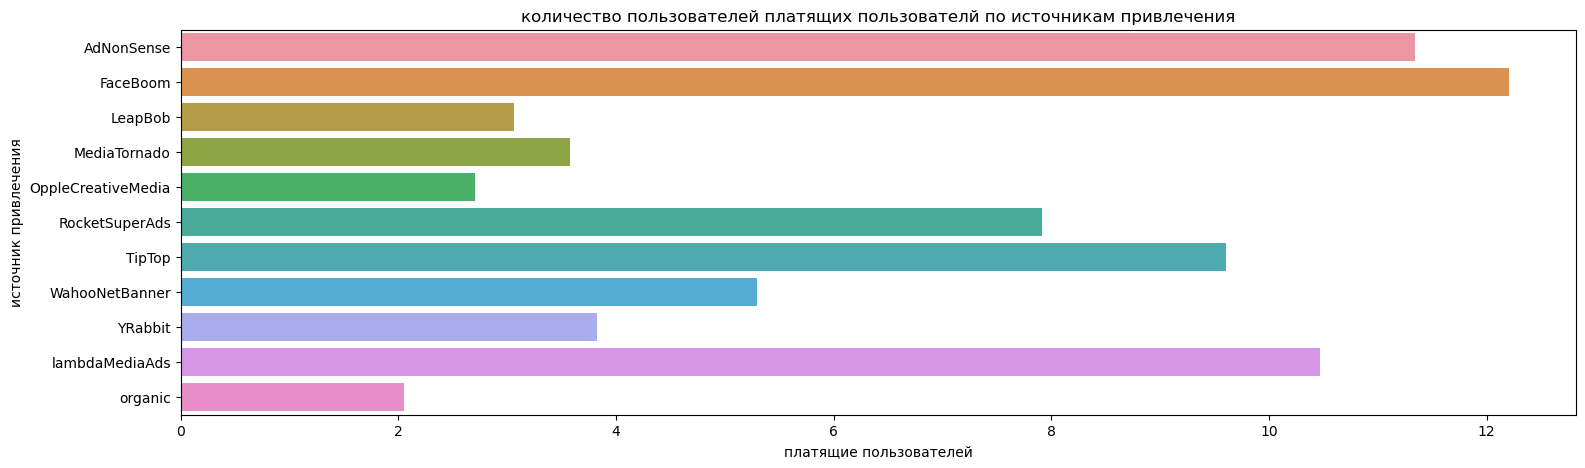

In [45]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='payer', y='Channel', data=chanel_profiles)
ax.set(title='количество пользователей платящих пользователй по источникам привлечения',
       xlabel='платящие пользователей', ylabel='источник привлечения')
plt.xlim()
plt.show()

Логично что платить органические пользователи не особо любят, но всё-таки есть такие. Удивляет что по пользователи из Faceboom не сильно предпочитают больше платить по сравнению с другими источниками привлечения. На втором месте AdNonSense. Хотя по количеству пользователей они на последнем месте.

#### Общий вывод.

    Были исследованы даты привлечения и профили пользователей. Больше всего пользоватлей в стране США. Они же самые платящие. Видимо, так как много пользователей из США, поэтому количество пользователей Iphone преобладает. Ведь в США - это наиболее популярный девайс. В мире же больше пользователей Android. Количество платящих пользоватлей так же больше на Iphone и Mac. 
    Так же были исследованы источники привлечения пользователей. Больше всего пользователей пришли органическим путем, что логично для хорошего приложения. На втором месте Faccebom и TipTop. Но вот платить пользователи не особо любят, поэтому на втором месте AdNonSense. Нужно будет сравнить результаты конвертации пользователей в платящих и затраты на рекламу. Возможно, стоило сосредоточиться на тех сетях, откуда приходят платящие пользователи.

### Маркетинг


#### Общая сумма трат на маркетинг

In [46]:
costs_sum = costs['costs'].sum()
print(f'общая сумма трат на маркетинг {costs_sum:.2f}$')

общая сумма трат на маркетинг 105497.30$


#### Траты на каждый источник 

In [47]:
costs_sum = costs.groupby('Channel').agg(
    {'costs': 'sum'}).reset_index().sort_values('costs', ascending=False)
costs_sum

,Channel,costs
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


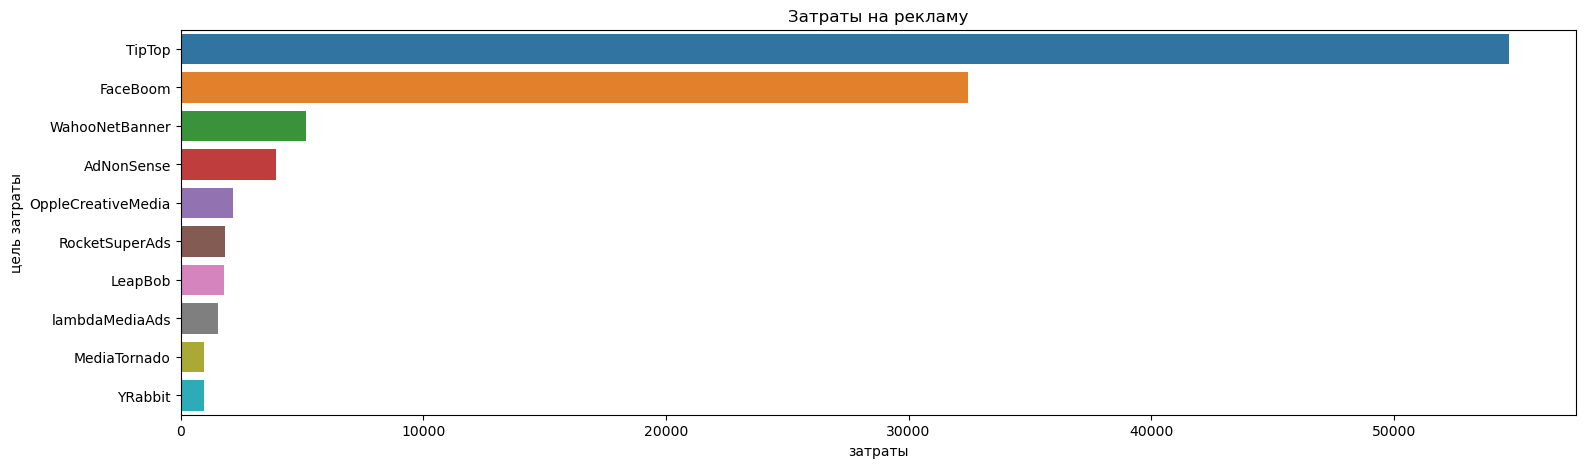

In [48]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='costs', y='Channel', data=costs_sum)
ax.set(title='Затраты на рекламу', xlabel='затраты', ylabel='цель затраты')
plt.xlim()
plt.show()

Если сравнить этот график с графиком конвертации в платных пользователей, то выходит что затрат больше всего не на самый эффектичный источник привлечения. Возможно, стоило бы сосредоточиться на других источниках.

Добавим неделю и месяц, чтобы посчитать суммы трат в месяц и неделю для каждого из источников.

#### Затраты на каждый источник по месяцам и неделям.

In [49]:
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')

costs

,dt,Channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,2019-04-25,2019-05-01
1,2019-05-02,FaceBoom,78.1,2019-05-02,2019-05-01
2,2019-05-03,FaceBoom,85.8,2019-05-02,2019-05-01
3,2019-05-04,FaceBoom,136.4,2019-05-02,2019-05-01
4,2019-05-05,FaceBoom,122.1,2019-05-02,2019-05-01
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-17,2019-10-01
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-24,2019-10-01
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-24,2019-10-01
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-24,2019-10-01


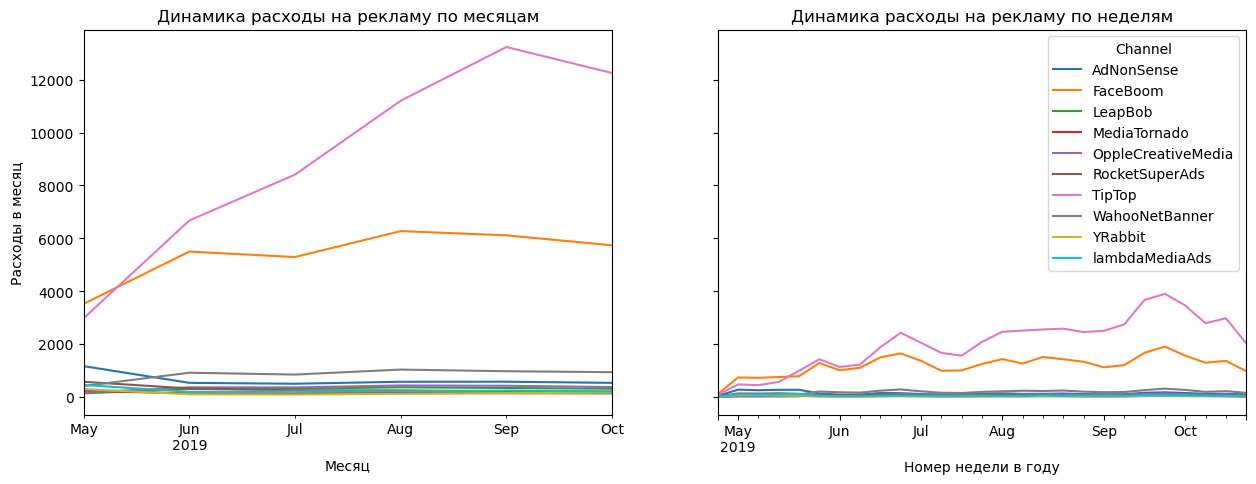

In [50]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='month',
    columns='Channel', values='costs', aggfunc='sum'
).plot(grid=False, ax=ax1, legend=False)
plt.title('Динамика расходы на рекламу по месяцам')

plt.xlabel('Месяц')
plt.ylabel('Расходы в месяц')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs.pivot_table(
    index='week',
    columns='Channel', values='costs', aggfunc='sum'
).plot(grid=False, ax=ax2)
plt.title('Динамика расходы на рекламу по неделям')

plt.xlabel('Номер недели в году')
plt.ylabel('Расходы за неделю')
plt.show()

Затраты на привлечение пользователей повышались в течение представленного промежутка. Но затраты шли больше всего не пропорционально на те источники, из которых приходили платящие пользователи, а больше всего на Faceboom и  TipTop

In [51]:
profiles

,User Id,first_ts,Channel,Device,Region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.884211
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
149966,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
149967,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
149968,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
149969,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


#### Стоимость привлечения пользователя в среднем по источникам трафика

In [52]:
profiles.pivot_table(columns='Channel', values='acquisition_cost', aggfunc='mean'
                     )

Channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
acquisition_cost,1.008054,1.11363,0.210196,0.218767,0.250087,0.412188,2.799719,0.602527,0.218975,0.724802,0.0


In [53]:
profiles['acquisition_cost'].mean()

0.7034513339246624

Самый дешевый пользователь в LeapBob, самый дорогой в TipTop. Учитывая что из TipTop пользователи не так хорошо конвертируютсв в платящих, то стоит задуматься о распределении трат.

#### Общий вывод

Траты на маркетинг достаточно большие и составляют 105497.30$. При этом сумма распределяется между популярнымми социальными сетями, а не источниками, откуда приходят платящие пользователи. Возможно, компания старается быть модной.

### Оценка окупаемости рекламы



In [54]:
profiles = profiles.query('Channel != "organic"')

In [55]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    
    ignore_horizon=False,
)
ltv

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88619,0.345678,0.435821,0.504593,0.561192,0.611608,0.654496,0.69428,0.729927,0.764779,0.796833,0.826329,0.852254,0.878307,0.902229


#### Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

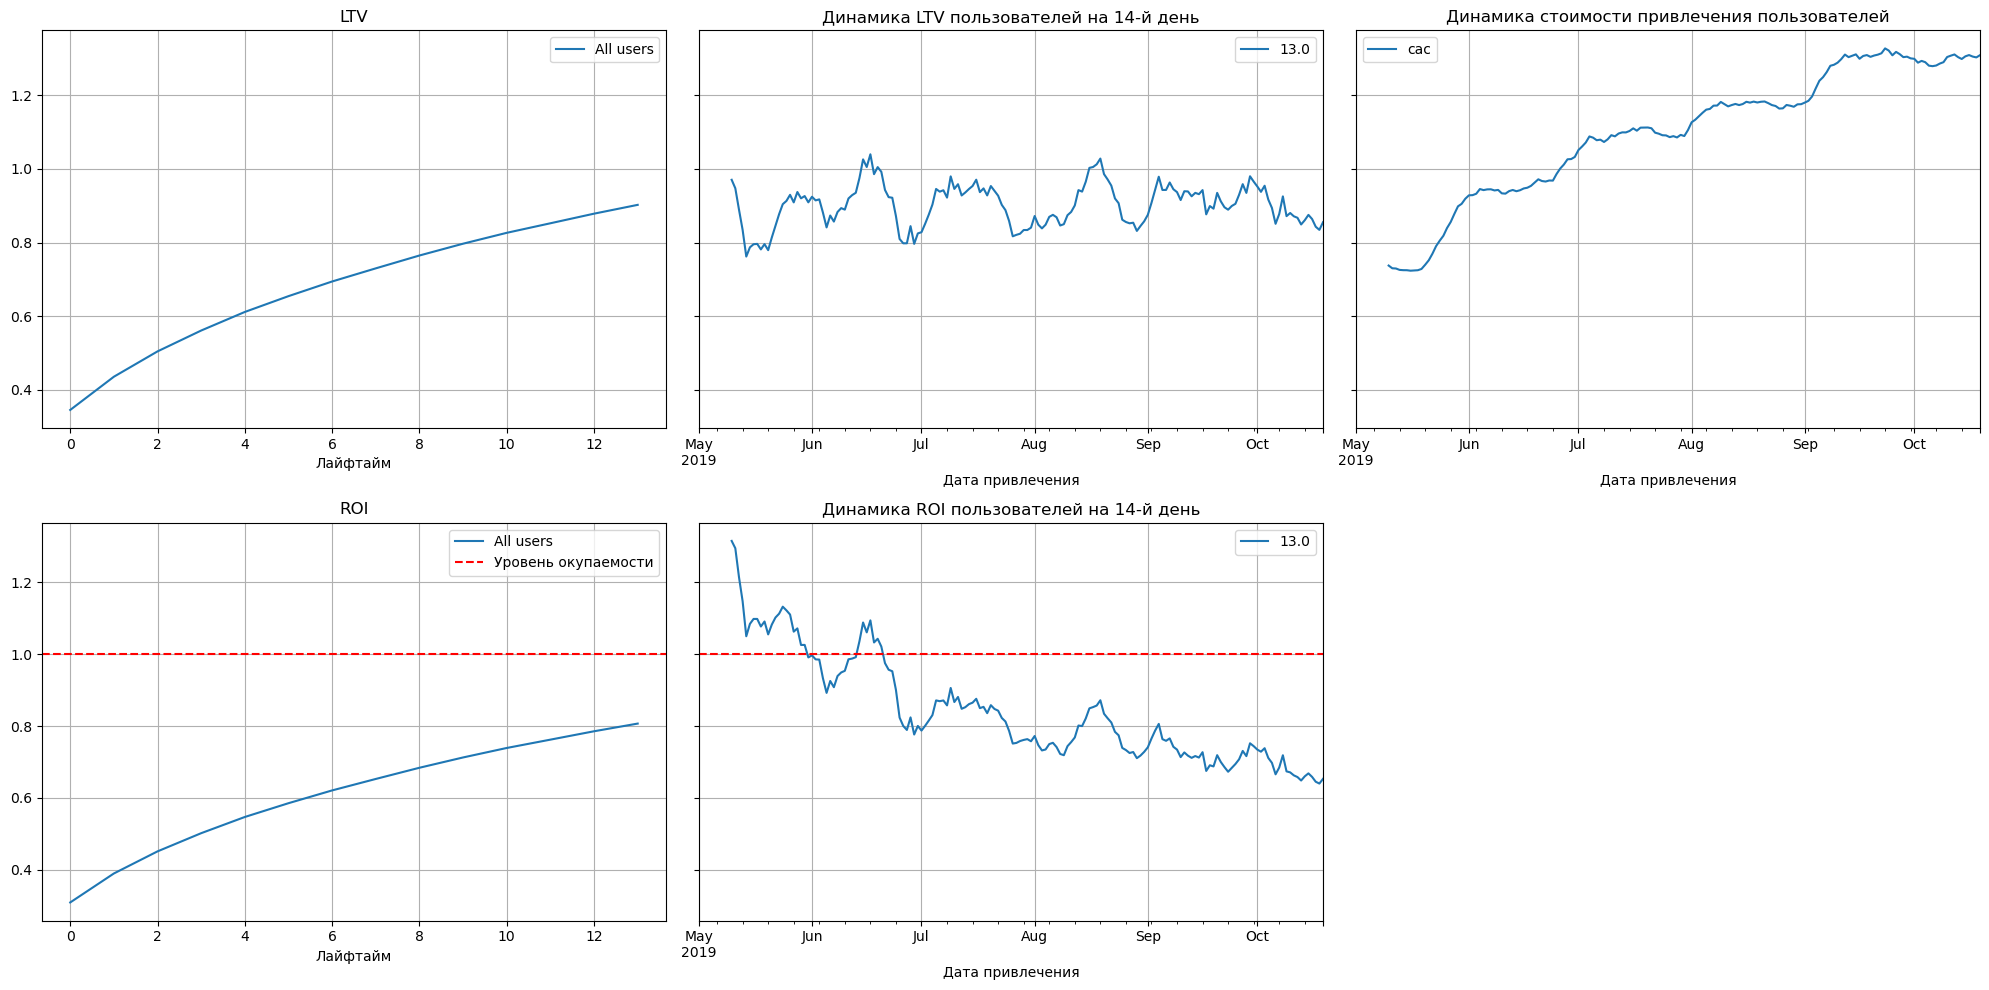

In [56]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=10)

Со временем пользователи приносят всё больше денег компании. Количество денег, которые приносят пользователи компании на 14 день подвергается волнообразным волнениям. Новые клиенты, пришедшие в приложение не успевают себя окупить за заданный период. Это означает что затраты привлечения не эффективны. Причем, из-за роста стоимости привлечения, этот показатель будет только падать. 

In [57]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,

    ignore_horizon=False,
)


####  Конверсия пользователей

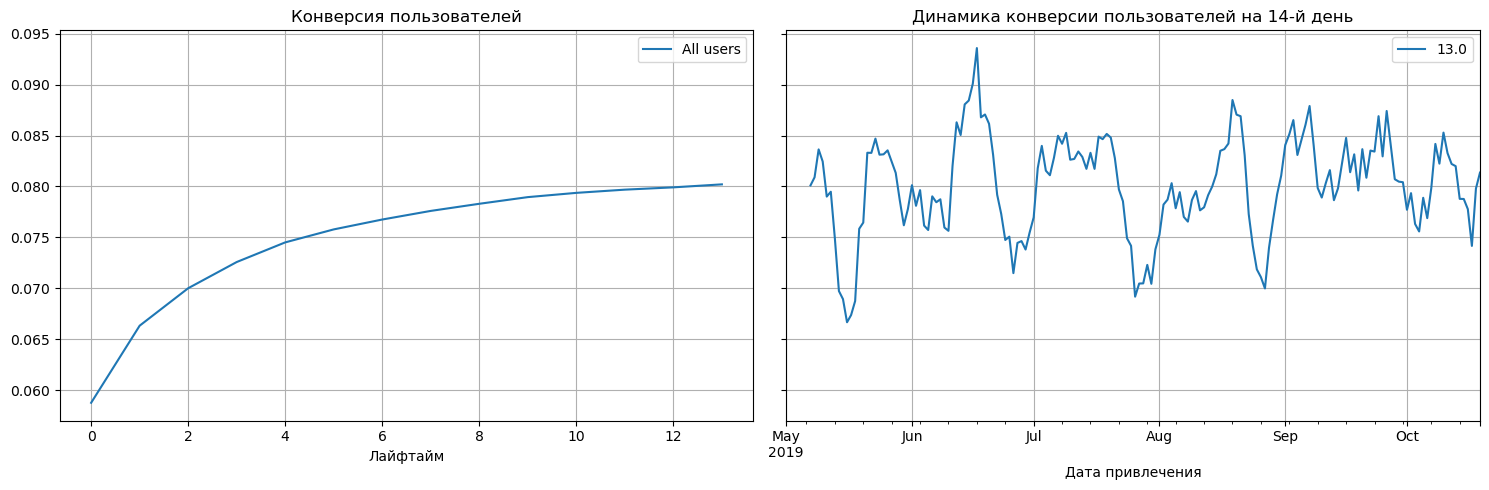

In [58]:
plot_conversion(conversion, conversion_history, 14, window=7)

In [59]:
conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88619,0.058757,0.066329,0.070008,0.07258,0.07451,0.075785,0.076756,0.077602,0.078301,0.078956,0.079373,0.079689,0.079915,0.080209


In [60]:
conversion.drop(columns=['cohort_size'])

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,
All users,0.058757,0.066329,0.070008,0.07258,0.07451,0.075785,0.076756,0.077602,0.078301,0.078956,0.079373,0.079689,0.079915,0.080209


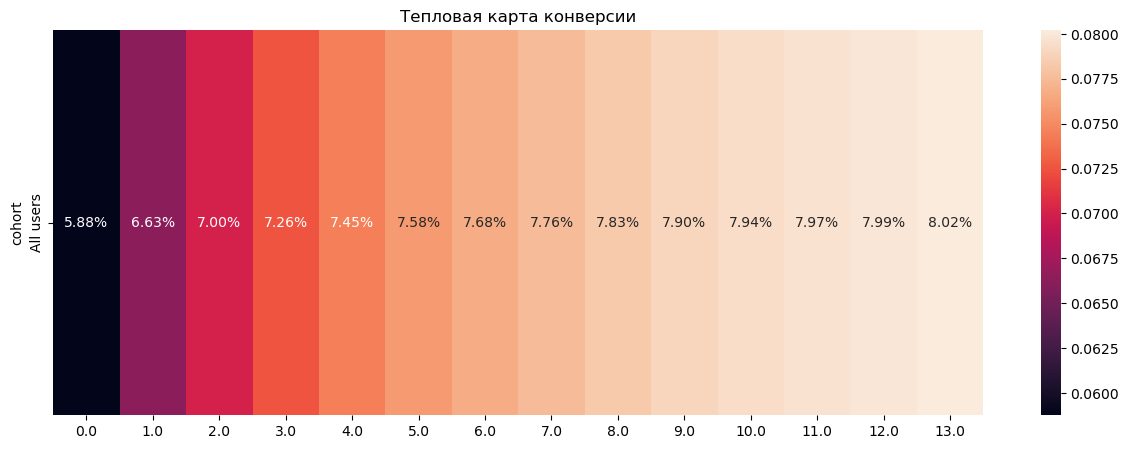

In [61]:
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show()

Конверсия пользователей начинается с 5.88 процентов и к 14 дню достигает 8.02 процента. 

#### Конверсия пользователей по девайсам.

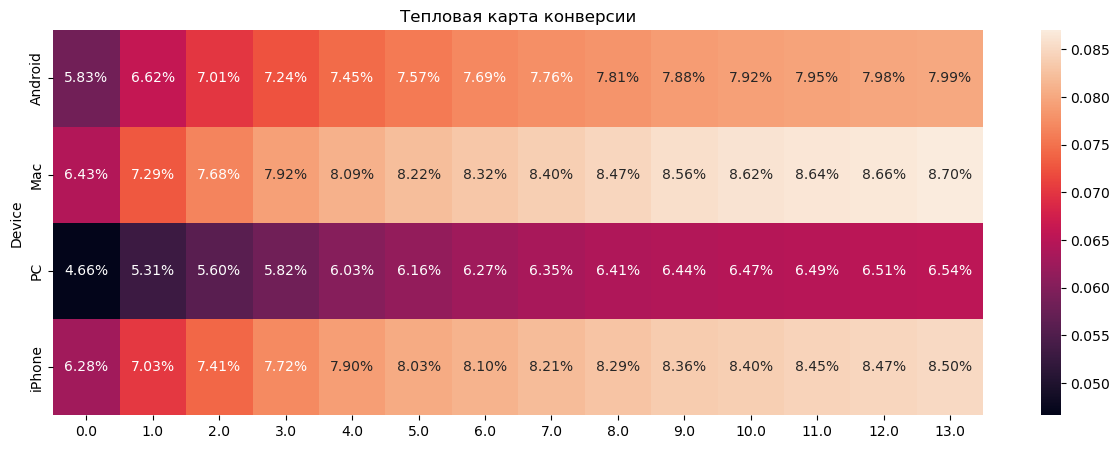

In [62]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Device'],
    ignore_horizon=False,
)
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show()

Конверсия пользователей начинается PC самая низкая, составляет всего 6.54 процента. Вероятно есть какие-то проблемы с удобством использования приложения, так как конверсия Mac, Android и Iphone очень схожи по динамике.

#### Конверсия пользователей по странам.

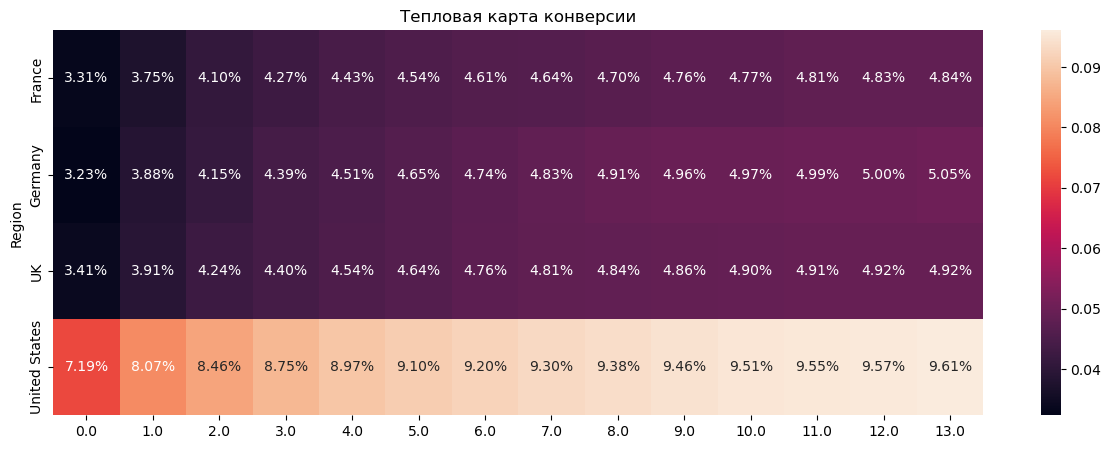

In [63]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Region'],
    ignore_horizon=False,
)
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show()

Конверсия в странах, кроме США не такая большая. Вероятно, нужно поработать чтобы она стала выше. 

#### Конверсия пользователей по источникам привлечения.

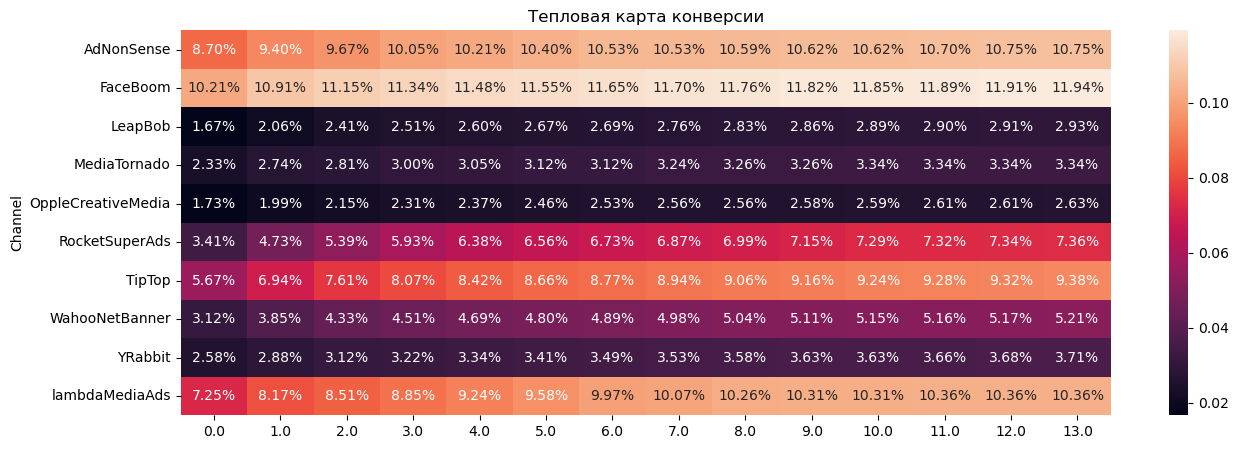

In [64]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Channel'],
    ignore_horizon=False,
)
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.show()

Затраты на маркетинг в TipTop самые большие, но при этом пользователи не лучше всех конвертируются в платящих. Тут видна явная проблема. Наилучшая конверсия у FaceBoom

In [65]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81310,1.0,0.176793,0.086545,0.051765,0.033465,0.024683,0.018608,0.01418,0.011721,0.009531,0.007478,0.006383,0.006014,0.004710
True,7309,1.0,0.380490,0.292790,0.235600,0.210289,0.190861,0.166644,0.15693,0.145163,0.136407,0.135039,0.121905,0.118758,0.104802


#### Удержание пользователей

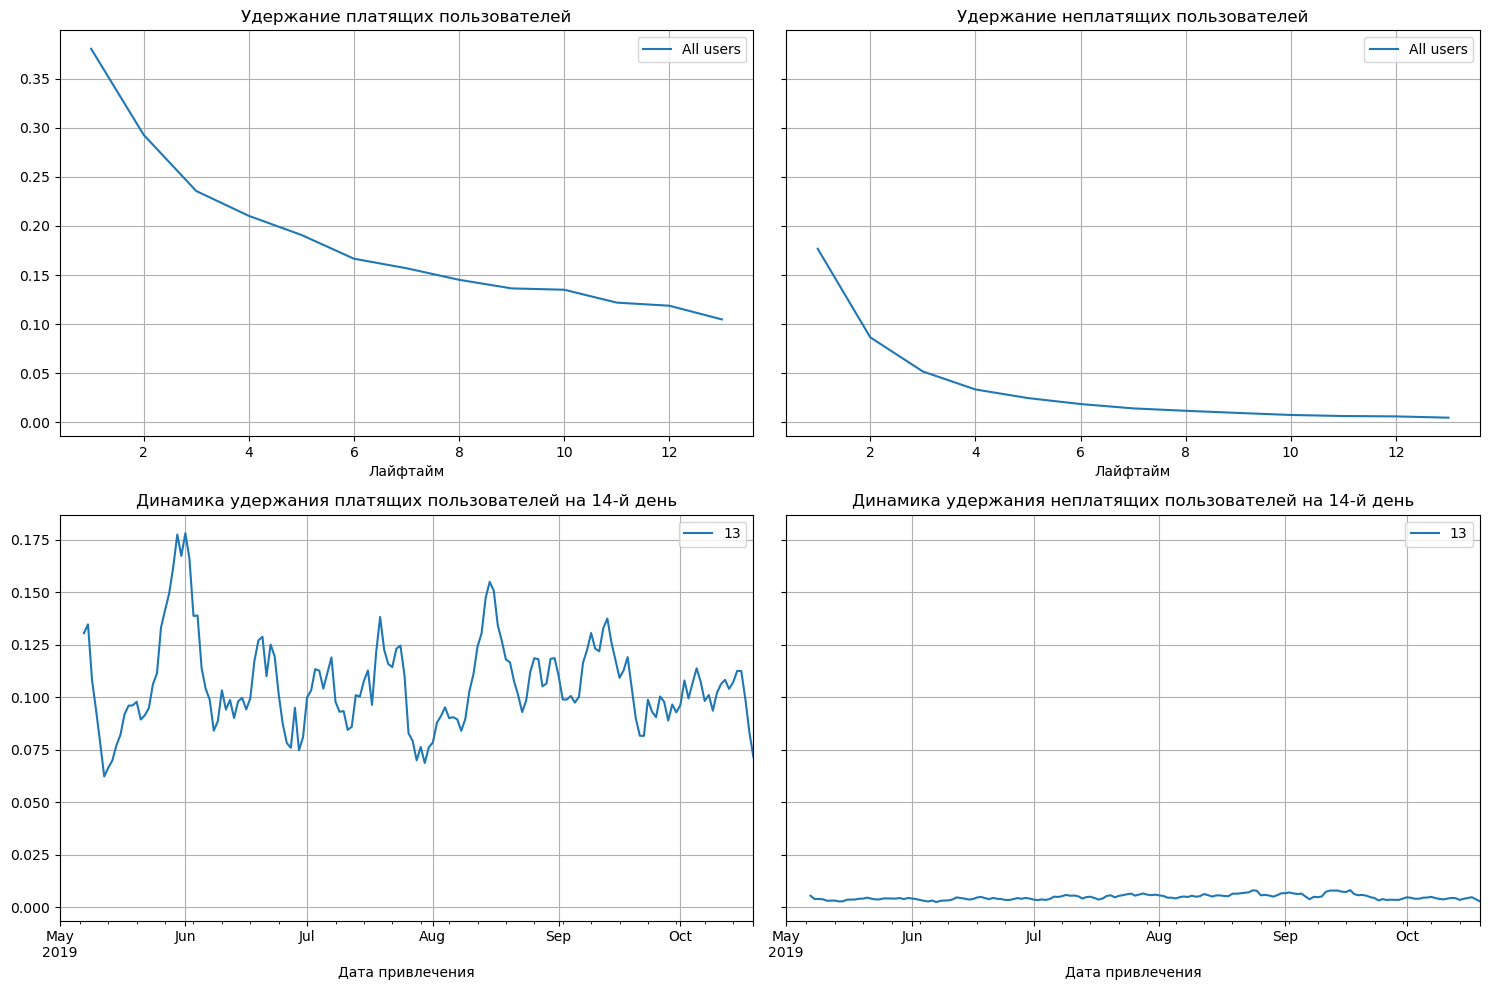

In [66]:
plot_retention(retention, retention_history, 14, window=7)

Платящие пользователи держатся в приложении дольше неплатящих. Это не удивительно, ведь они видят ценность в приложении, раз готовы платить. Но при этом очень многие платящие пользователи пришли в начале мая, когда затраты на рекламу были не такие большие. Потом такой пик удалось почти дотигнуть только в середине августа. Платящие пользователи держатся около 6 дней, а неплатящие начинают уходить на второй день.

#### Удержание пользователей по девайсам

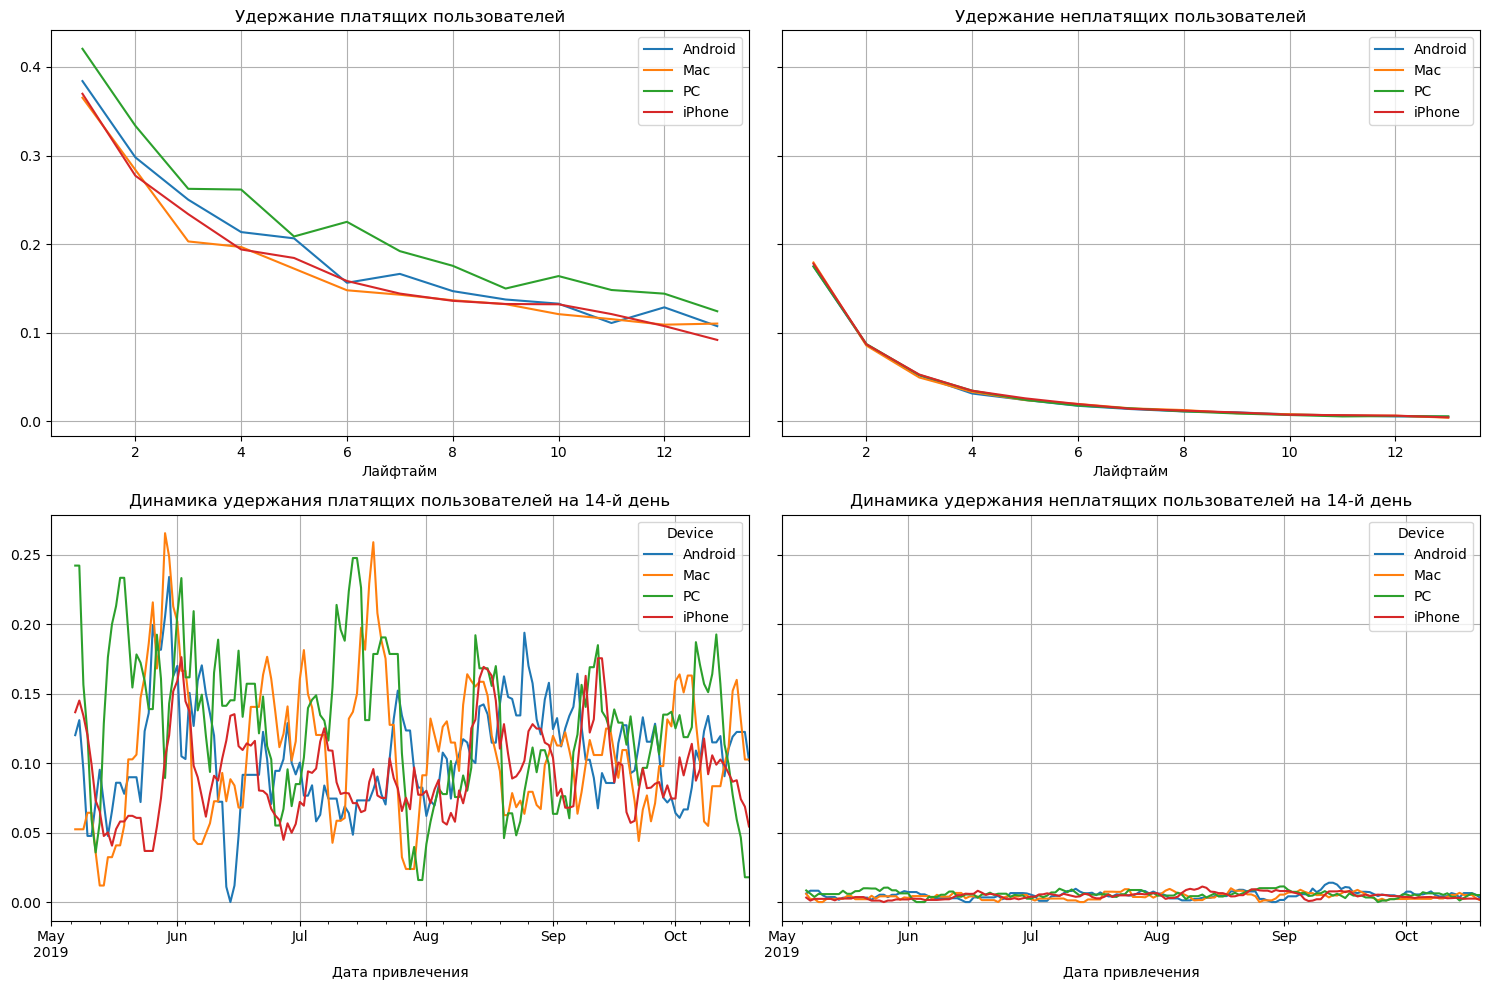

In [67]:
retention_raw, retention, retention_history = get_retention(profiles,
    visits, 
    observation_date, 
    horizon_days, 
    dimensions = ['Device'], 
    ignore_horizon = False
)
plot_retention(retention, retention_history, 14, window=7)

Хоть и у пользователей PC худшая конверсия, но зато они дольше всего держатся в приложении. Если суметь улучшить их конверсию в платящих, то они могут быть потенциально очень прибыльной аудиторией.

#### Удержание пользователей по странам

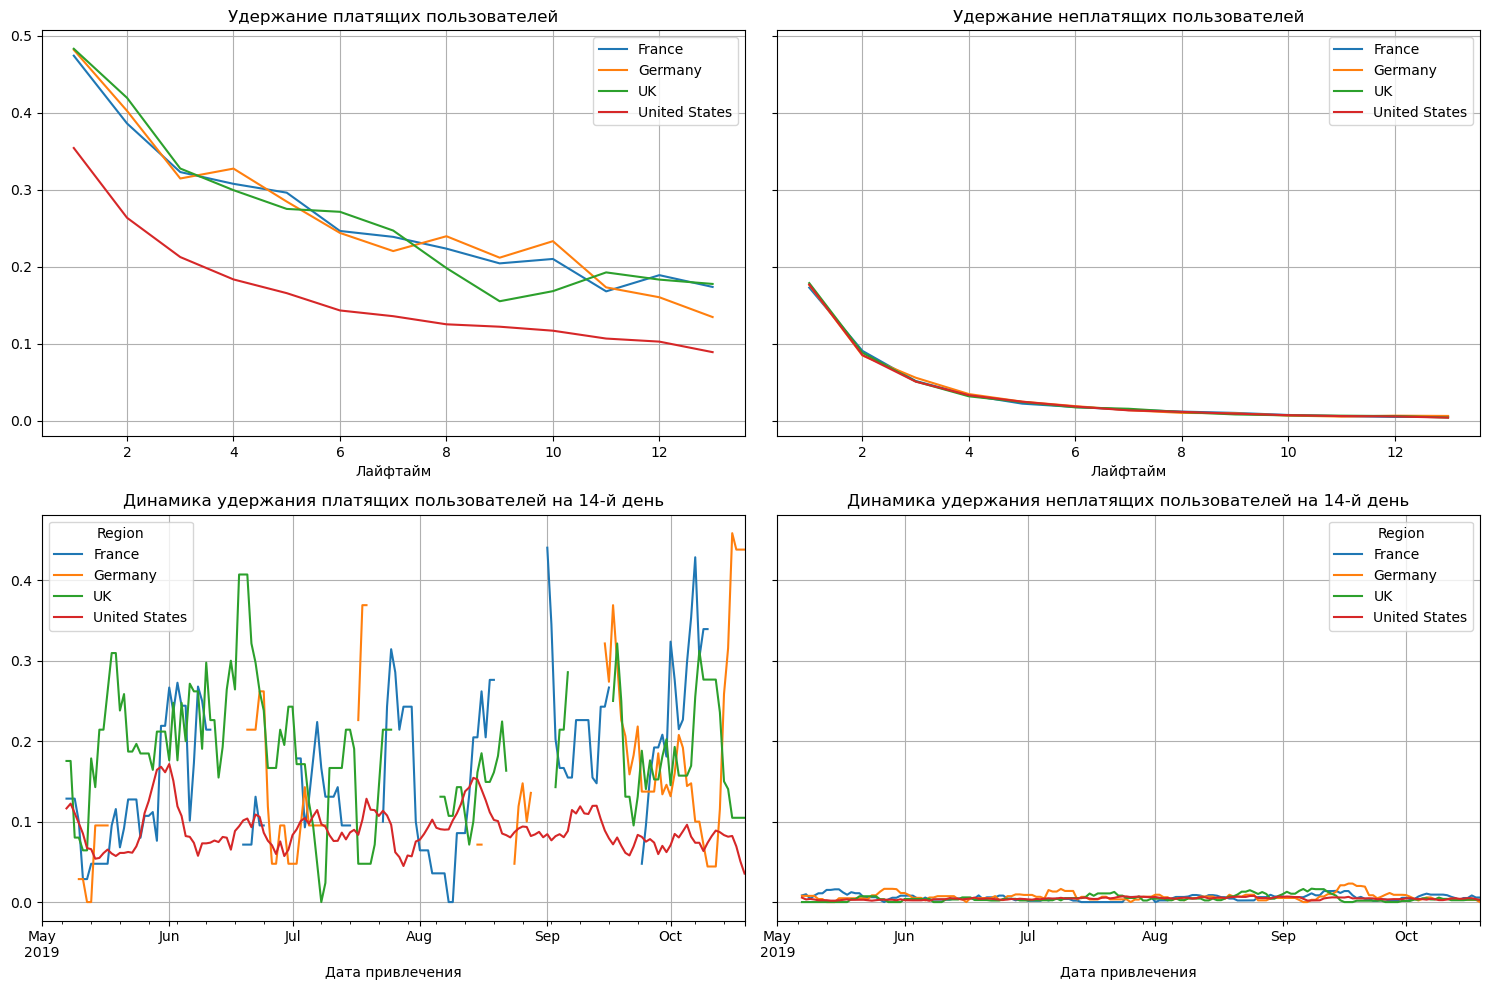

In [68]:
retention_raw, retention, retention_history = get_retention(profiles, 
    visits, 
    observation_date, 
    horizon_days, 
    dimensions = ['Region'], 
    ignore_horizon = False
)
plot_retention(retention, retention_history, 14, window=7)

Пользователи из США хоть и лучше всего конвертируются в платящих, но при этом быстро уходят. Тогда как пользьватели из других стран дольше держатся.

#### Удержание пользователей в зависимости от источника привлечения.

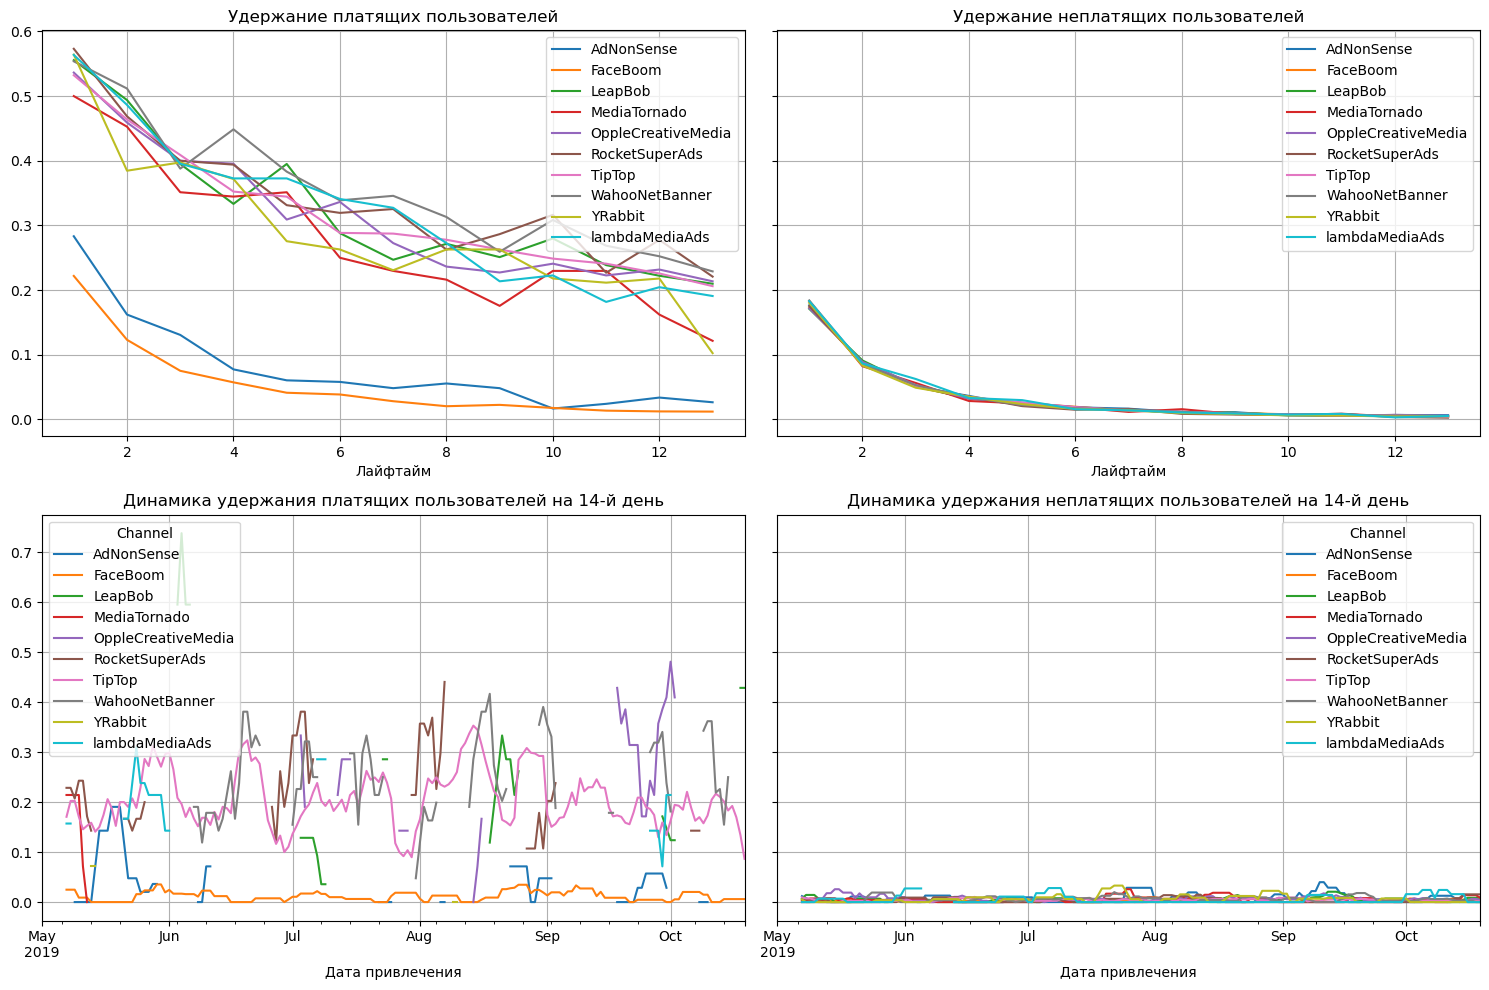

In [69]:
retention_raw, retention, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date,
    horizon_days, 
    dimensions = ['Channel'], 
    ignore_horizon = False)
plot_retention(retention, retention_history, 14, window=7)

Пользователи из Faceboom и AdNonSense очень быстро покидают приложение. Нужно либо лучше работать над их удержание, либо направить свои траты на другие источники привлечения.

In [70]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Device'],
    ignore_horizon=False,
)
ltv

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Device,,,,,,,,,,,,,,,
Android,20677,0.339557,0.430891,0.500354,0.555379,0.608336,0.661587,0.700013,0.738776,0.774210,0.807084,0.834113,0.856316,0.888228,0.912363
Mac,17745,0.381997,0.479992,0.549905,0.604864,0.650990,0.685578,0.721631,0.752678,0.790765,0.825187,0.857191,0.884188,0.904437,0.930365
PC,18124,0.277461,0.361616,0.430517,0.485759,0.539736,0.581751,0.631379,0.662105,0.701159,0.729575,0.761678,0.788882,0.812285,0.836351
iPhone,32073,0.368077,0.456492,0.524115,0.583402,0.632544,0.673836,0.710996,0.749960,0.780272,0.812544,0.840768,0.867778,0.894763,0.917355


#### Окупаемость рекламы с разбивкой по устройствам

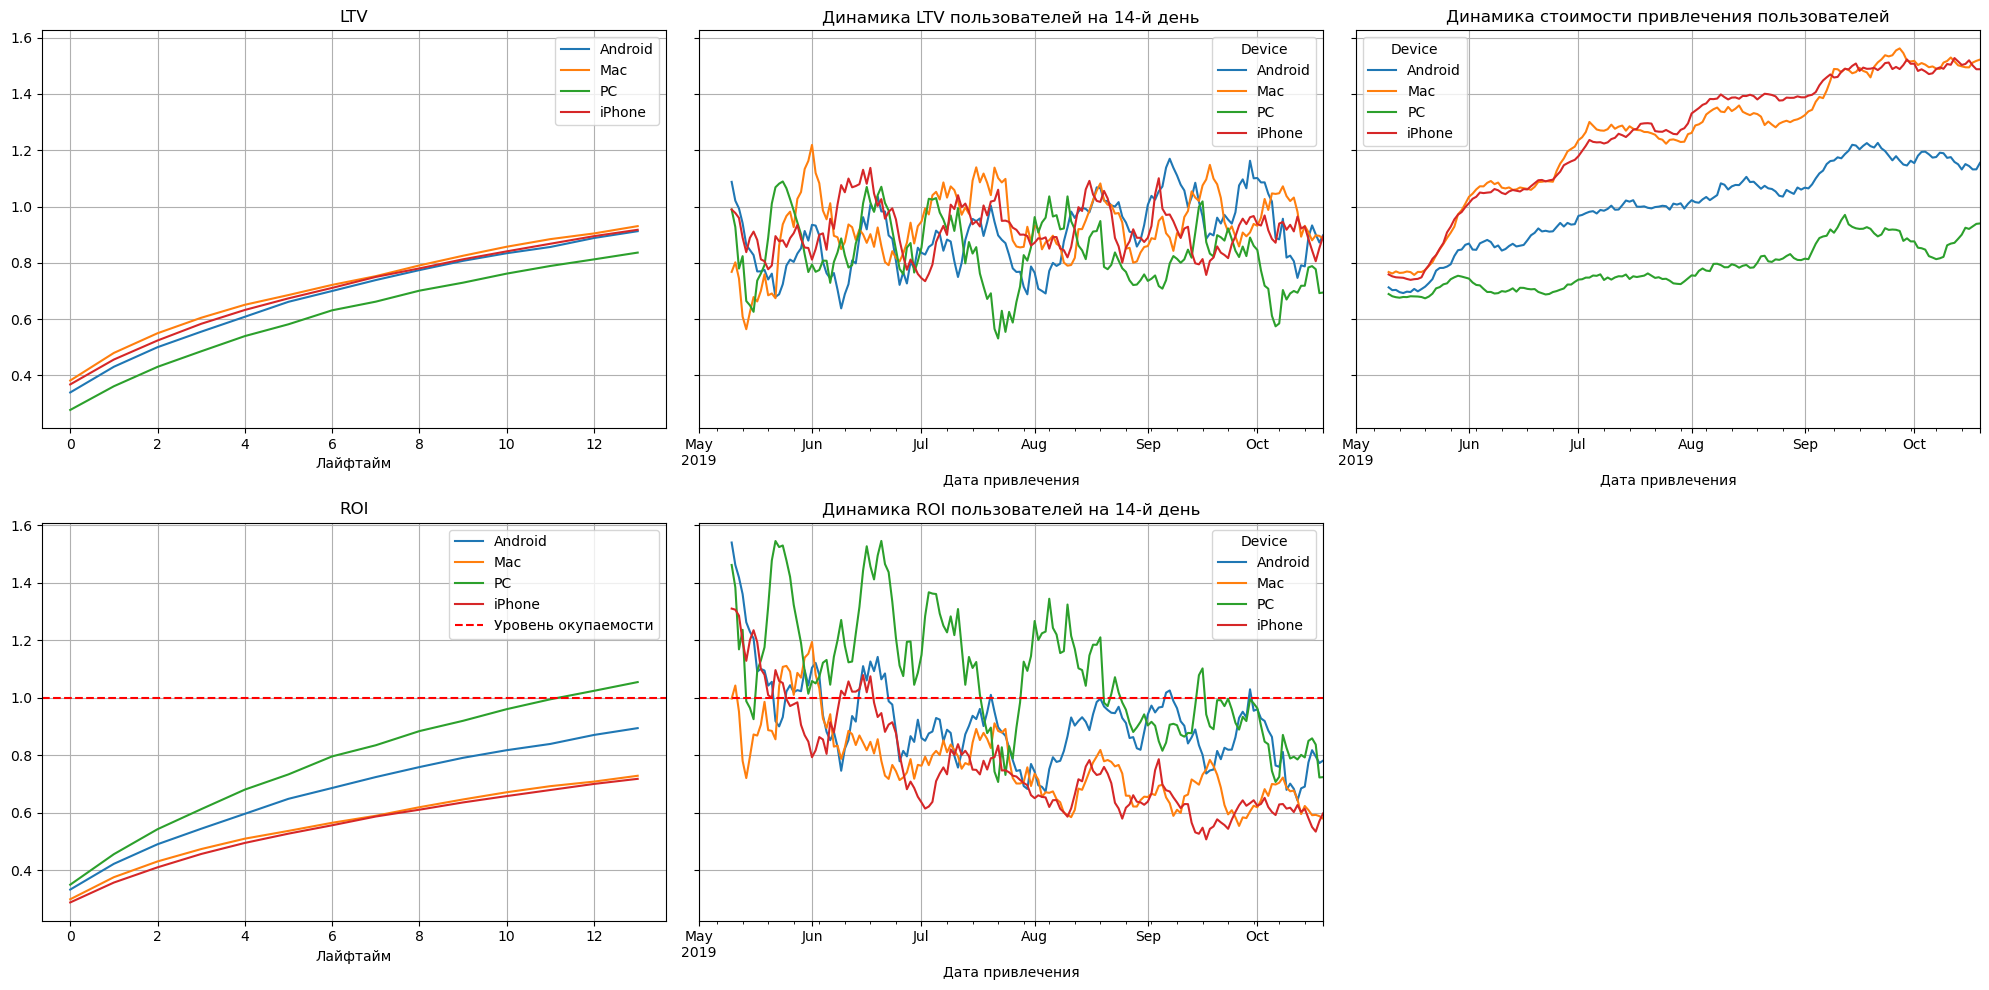

In [71]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=10)

Сумма доходов от пользователй Iphone иногда уступает пользователям Mac. В динамике нет явного лидера по LTV. Однако тоимость привлечения пользователей Mac и Iphone растет сильнее, чем других пользователей. Поэтому вложения в привлечения пользователей Iphone и Mac не успевают себя окупить за свой жизненный цикл. Под конец жизенного цикла только пользователи PC успевают окупиться, тогда как остальные остаются за гранью окупаемости.

In [72]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Region'],
    ignore_horizon=False,
)
ltv


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Region,,,,,,,,,,,,,,,
France,10513,0.193483,0.259857,0.311785,0.360302,0.407008,0.450302,0.481157,0.507358,0.541639,0.571069,0.600213,0.622048,0.650056,0.670469
Germany,9027,0.186412,0.258944,0.328054,0.375598,0.422917,0.461060,0.497103,0.534252,0.571294,0.605568,0.641720,0.666154,0.691585,0.713256
UK,10534,0.218724,0.296818,0.367696,0.416686,0.465593,0.504059,0.556195,0.585755,0.623859,0.645649,0.668957,0.692453,0.719936,0.743623
United States,58545,0.420407,0.519702,0.591068,0.651883,0.703715,0.748058,0.787799,0.826006,0.860037,0.894067,0.923713,0.951040,0.976581,1.001521


####  Окупаемость рекламы с разбивкой по странам

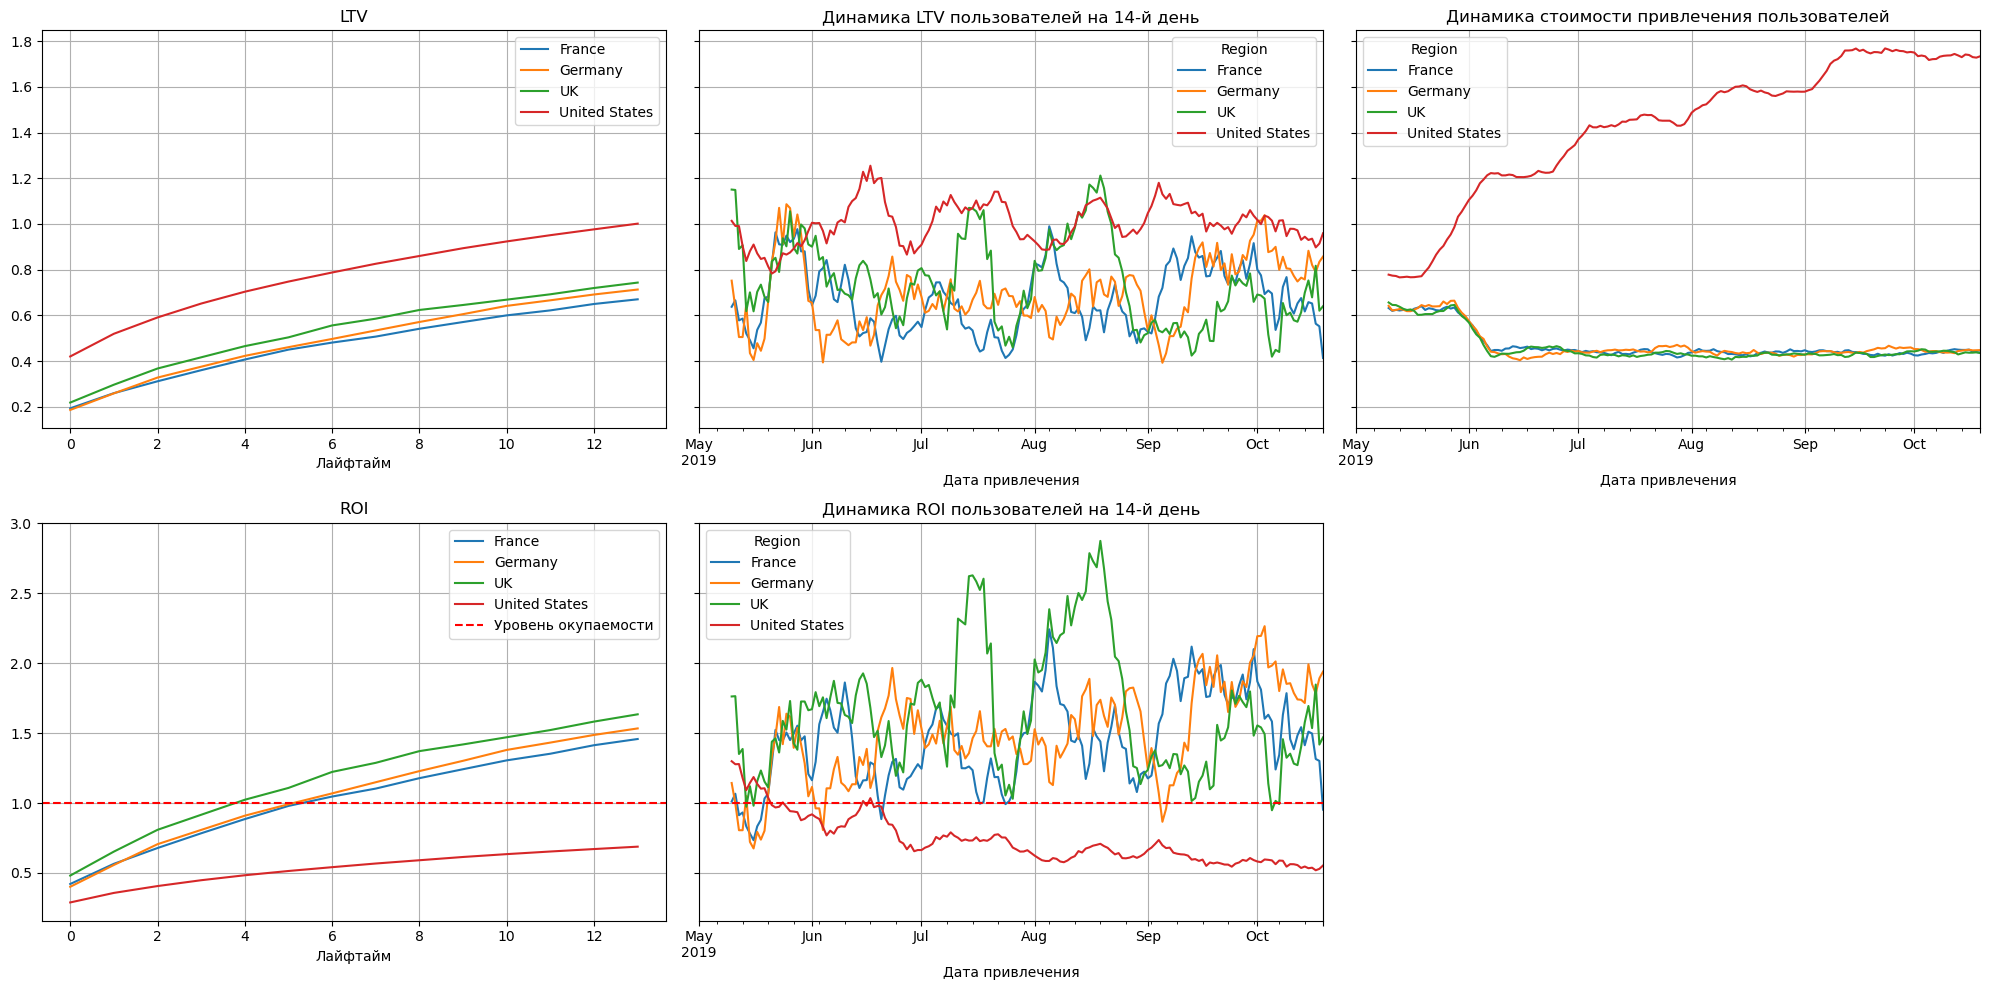

In [73]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=10)

Общая сумма доходов пользователей из США выше, чем из других стран. При этом доход, приносимый на 14 день у пользователей из США не всегда выше других стран. Иногда в лидеры вырывается Соединенное королевство. Пользователей из США очень дорого привлекать. Пользователи из любых других стран обходятся значительно дешевле. Причем, привлечение пользоватлей из других стран даже немного подешело.  Именно поэтому вложения в пользователей из других стран окупаются уже на 6 день, тогда как пользоватлеи США вообще не окупаются. При этом за всю историю пользователи из других стран остаются прибыльными, тогда как пользователи из США уже в июле перестают быть такими.

In [74]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Channel'],
    ignore_horizon=False,
)
ltv


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.505030,0.589149,0.644417,0.683509,0.706694,0.732582,0.754149,0.767628,0.789203,0.802682,0.806996,0.815084,0.827215,0.838006
FaceBoom,27534,0.585916,0.660884,0.700795,0.728926,0.747233,0.760464,0.774818,0.784861,0.792510,0.800885,0.806359,0.812340,0.817599,0.821586
LeapBob,8102,0.107061,0.155721,0.205608,0.235420,0.259686,0.288635,0.314626,0.333843,0.369589,0.394225,0.417630,0.437956,0.457665,0.473062
MediaTornado,4166,0.137518,0.191661,0.247002,0.293737,0.332328,0.367067,0.388627,0.418574,0.440139,0.461699,0.485658,0.508416,0.526383,0.533812
OppleCreativeMedia,8136,0.097275,0.131626,0.171749,0.206712,0.241192,0.266338,0.290259,0.309641,0.328665,0.347066,0.364362,0.376751,0.395162,0.409269
RocketSuperAds,4250,0.207619,0.318715,0.396207,0.456087,0.515734,0.571153,0.639275,0.687416,0.738160,0.790304,0.831633,0.864511,0.898798,0.934021
TipTop,18493,0.343642,0.497523,0.624310,0.740034,0.842856,0.935960,1.013950,1.096746,1.171717,1.245822,1.311772,1.371838,1.428026,1.488310
WahooNetBanner,8078,0.191396,0.291622,0.379109,0.443974,0.517118,0.569751,0.632182,0.678512,0.725712,0.765867,0.812938,0.849755,0.889912,0.919070
YRabbit,4102,0.163301,0.213423,0.256000,0.303932,0.356265,0.387894,0.414656,0.438988,0.460885,0.480349,0.502245,0.524147,0.546287,0.559668


#### Окупаемость рекламы с разбивкой по рекламным каналам

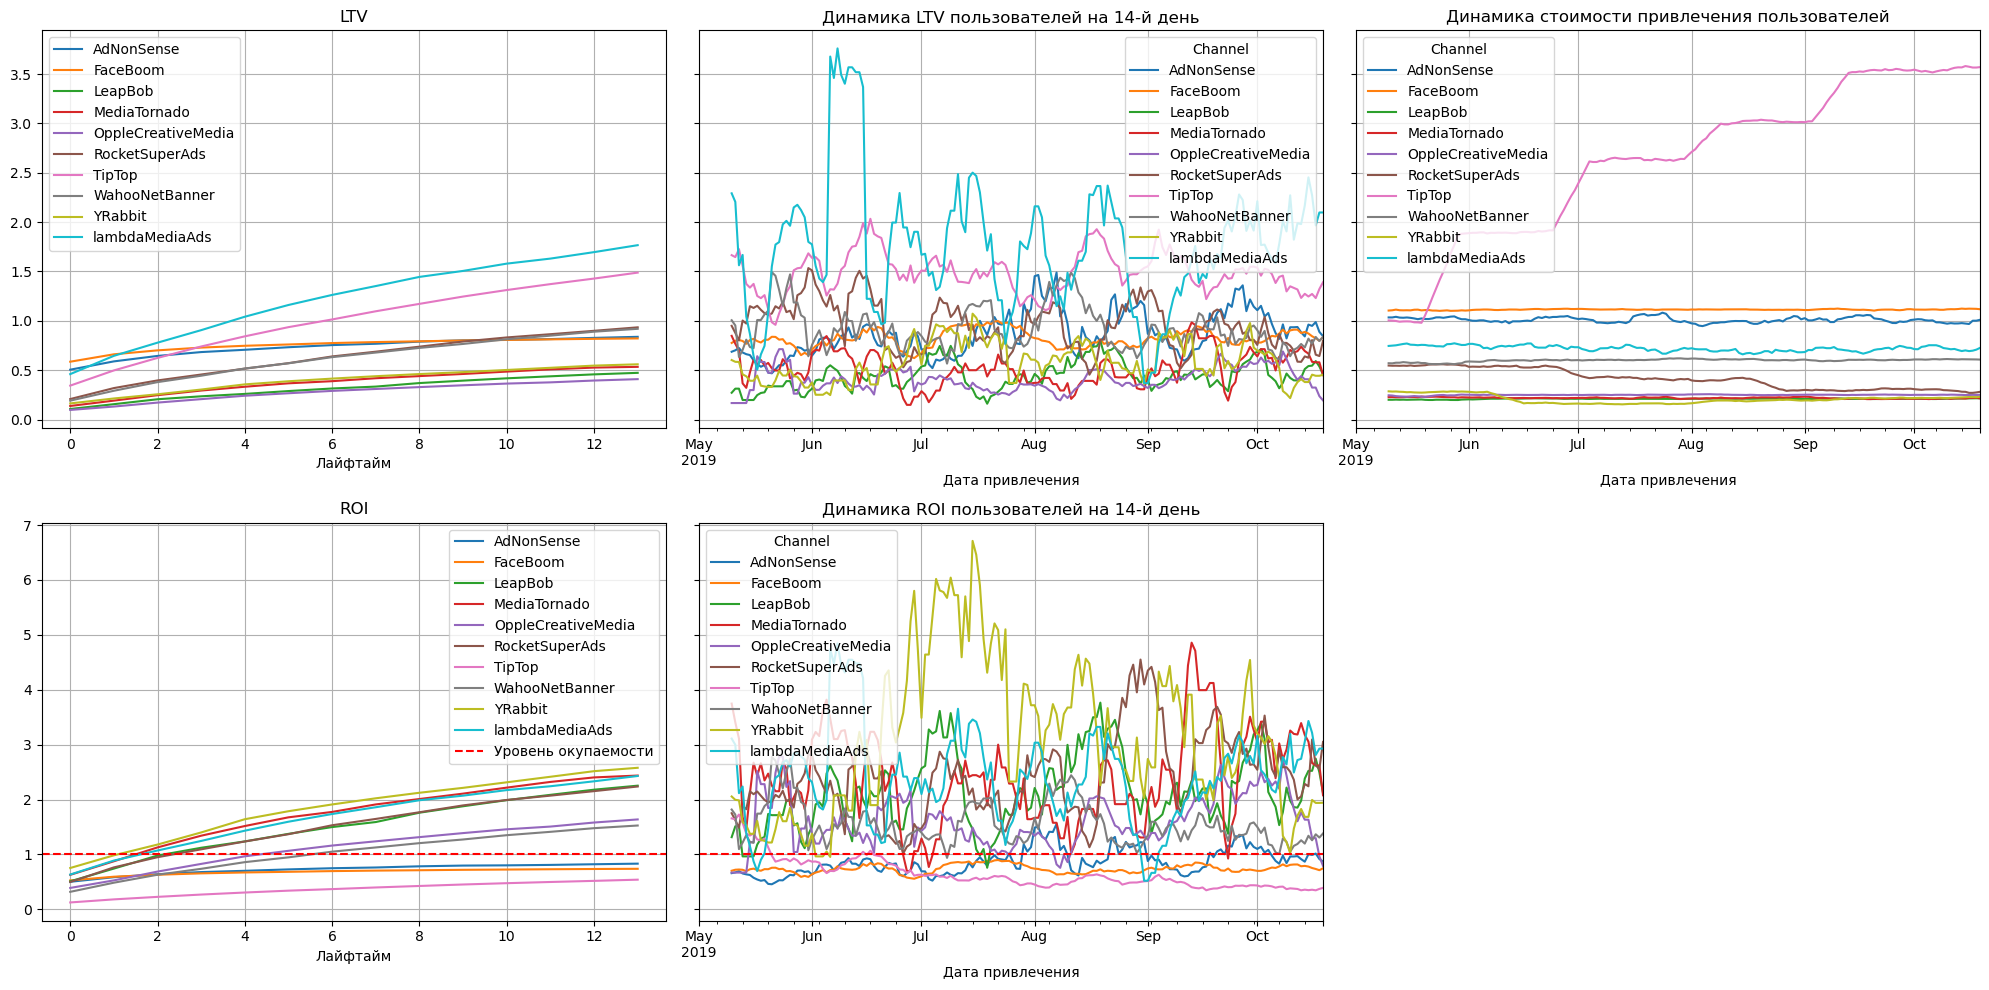

In [75]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=10)

Пользователи lambdaMediaAds по итогам принесли компании больше всего доходов. На втором месте пользователи из TipTop. При этом пользоватлей TipTop становится очень дорого привлекать начиная с июня, тогда как стоимость привлечения из других каналов практически не меняется. Пользователи TipTop, AdNonSense и FaceBoom обходятся дорого и так и не выходят на уровень окупаемости. Тогда как пользователи из всех остальных источников окупаются с 6 дня отчета и до конца. 

#### Общий вывод раздела
Затраты на рекламу не окупаются.
Как ни странно, но самые платящие пользователи являются самыми дорогими для компании. Например, пользователи iphone и mac так и не окупаются.  Так же слишком дорого обходятся пользователи из  США. Вероятно там рынок уже насышен, и нужно искать пользоватлей в других странах.  Лучше всего себя показал источник lambdaMediaAds, тогда как затраты на него только третьи с конца. 
 

В первую очередь нужно задуматься о том, чтобы выходить в новые страны, так как, как показал график, там затраты на привлечение новых пользователей вряд ли сильно будут отличаться и будут значительно ниже США. Они со временем даже снижаются. Так же стоит присмотреться к другим источникам траты на рекламу. LTV у пользоватлей из lambdaMediaAds оказался самым высоким, хотя вложений в эту рекламную сеть не так велики.  Вероятно, ролики в TipTop уже не так полезны для компании, так как требуют больших затрат на производство, но при этом пользователи оттуда приносят не настолько много денег. И пользователи TipTop не так хорошо конвертируются в платящих. Возможно, стоит снизить траты на эту социальную сеть. Так же, если смотреть на тепловую карту конверсии, то у RocketSuperAds почти такой же процент конверсии, как и у FaceBoom  и TipTop. Я считаю что необходимо проанализировать проблему с конверсией у пользователей PC. Возможно, так не так удобно пользоваться приложением или сложно найти кнопку покупки. Для этого нужно провести опрос на фокус группе. Нужно еще понять почему платящие пользователи из США так быстро покидают приложение. Этот показатель у них значительно выше, чем у других пользоватлей. 

# Итоги 
    Была проделана работа по исследованию рекламных компании приложения Procrastinate Pro+. Для этого в полученных данных были даты были переведены к требуемому типу данных. Так же заданы функции для составления профилей, удержания, конверсии и вложения инвестиций. Были проанализированы профили пользоватлей. Так же вычислено количество платящих и не платящих в зависимости от региона, девайса и рекламного источника. 
    Были посчитаны общие траты на маркетинг, траты на каждый источник, и общая стоимость привлечения пользоватлей.
    Были проанализированы графики удержания, окупаемости и жизеннного цикла инвестиций. Так же были проведены исследования жизенного цикла инвестиций в зависимости от страны, девайса и источника рекламы. 
    Даны рекоменадции по изменению ситуации. 